In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Importing and verifying the Dataset

In [2]:
df = pd.read_csv("Classified Data",index_col=0) 

In [3]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


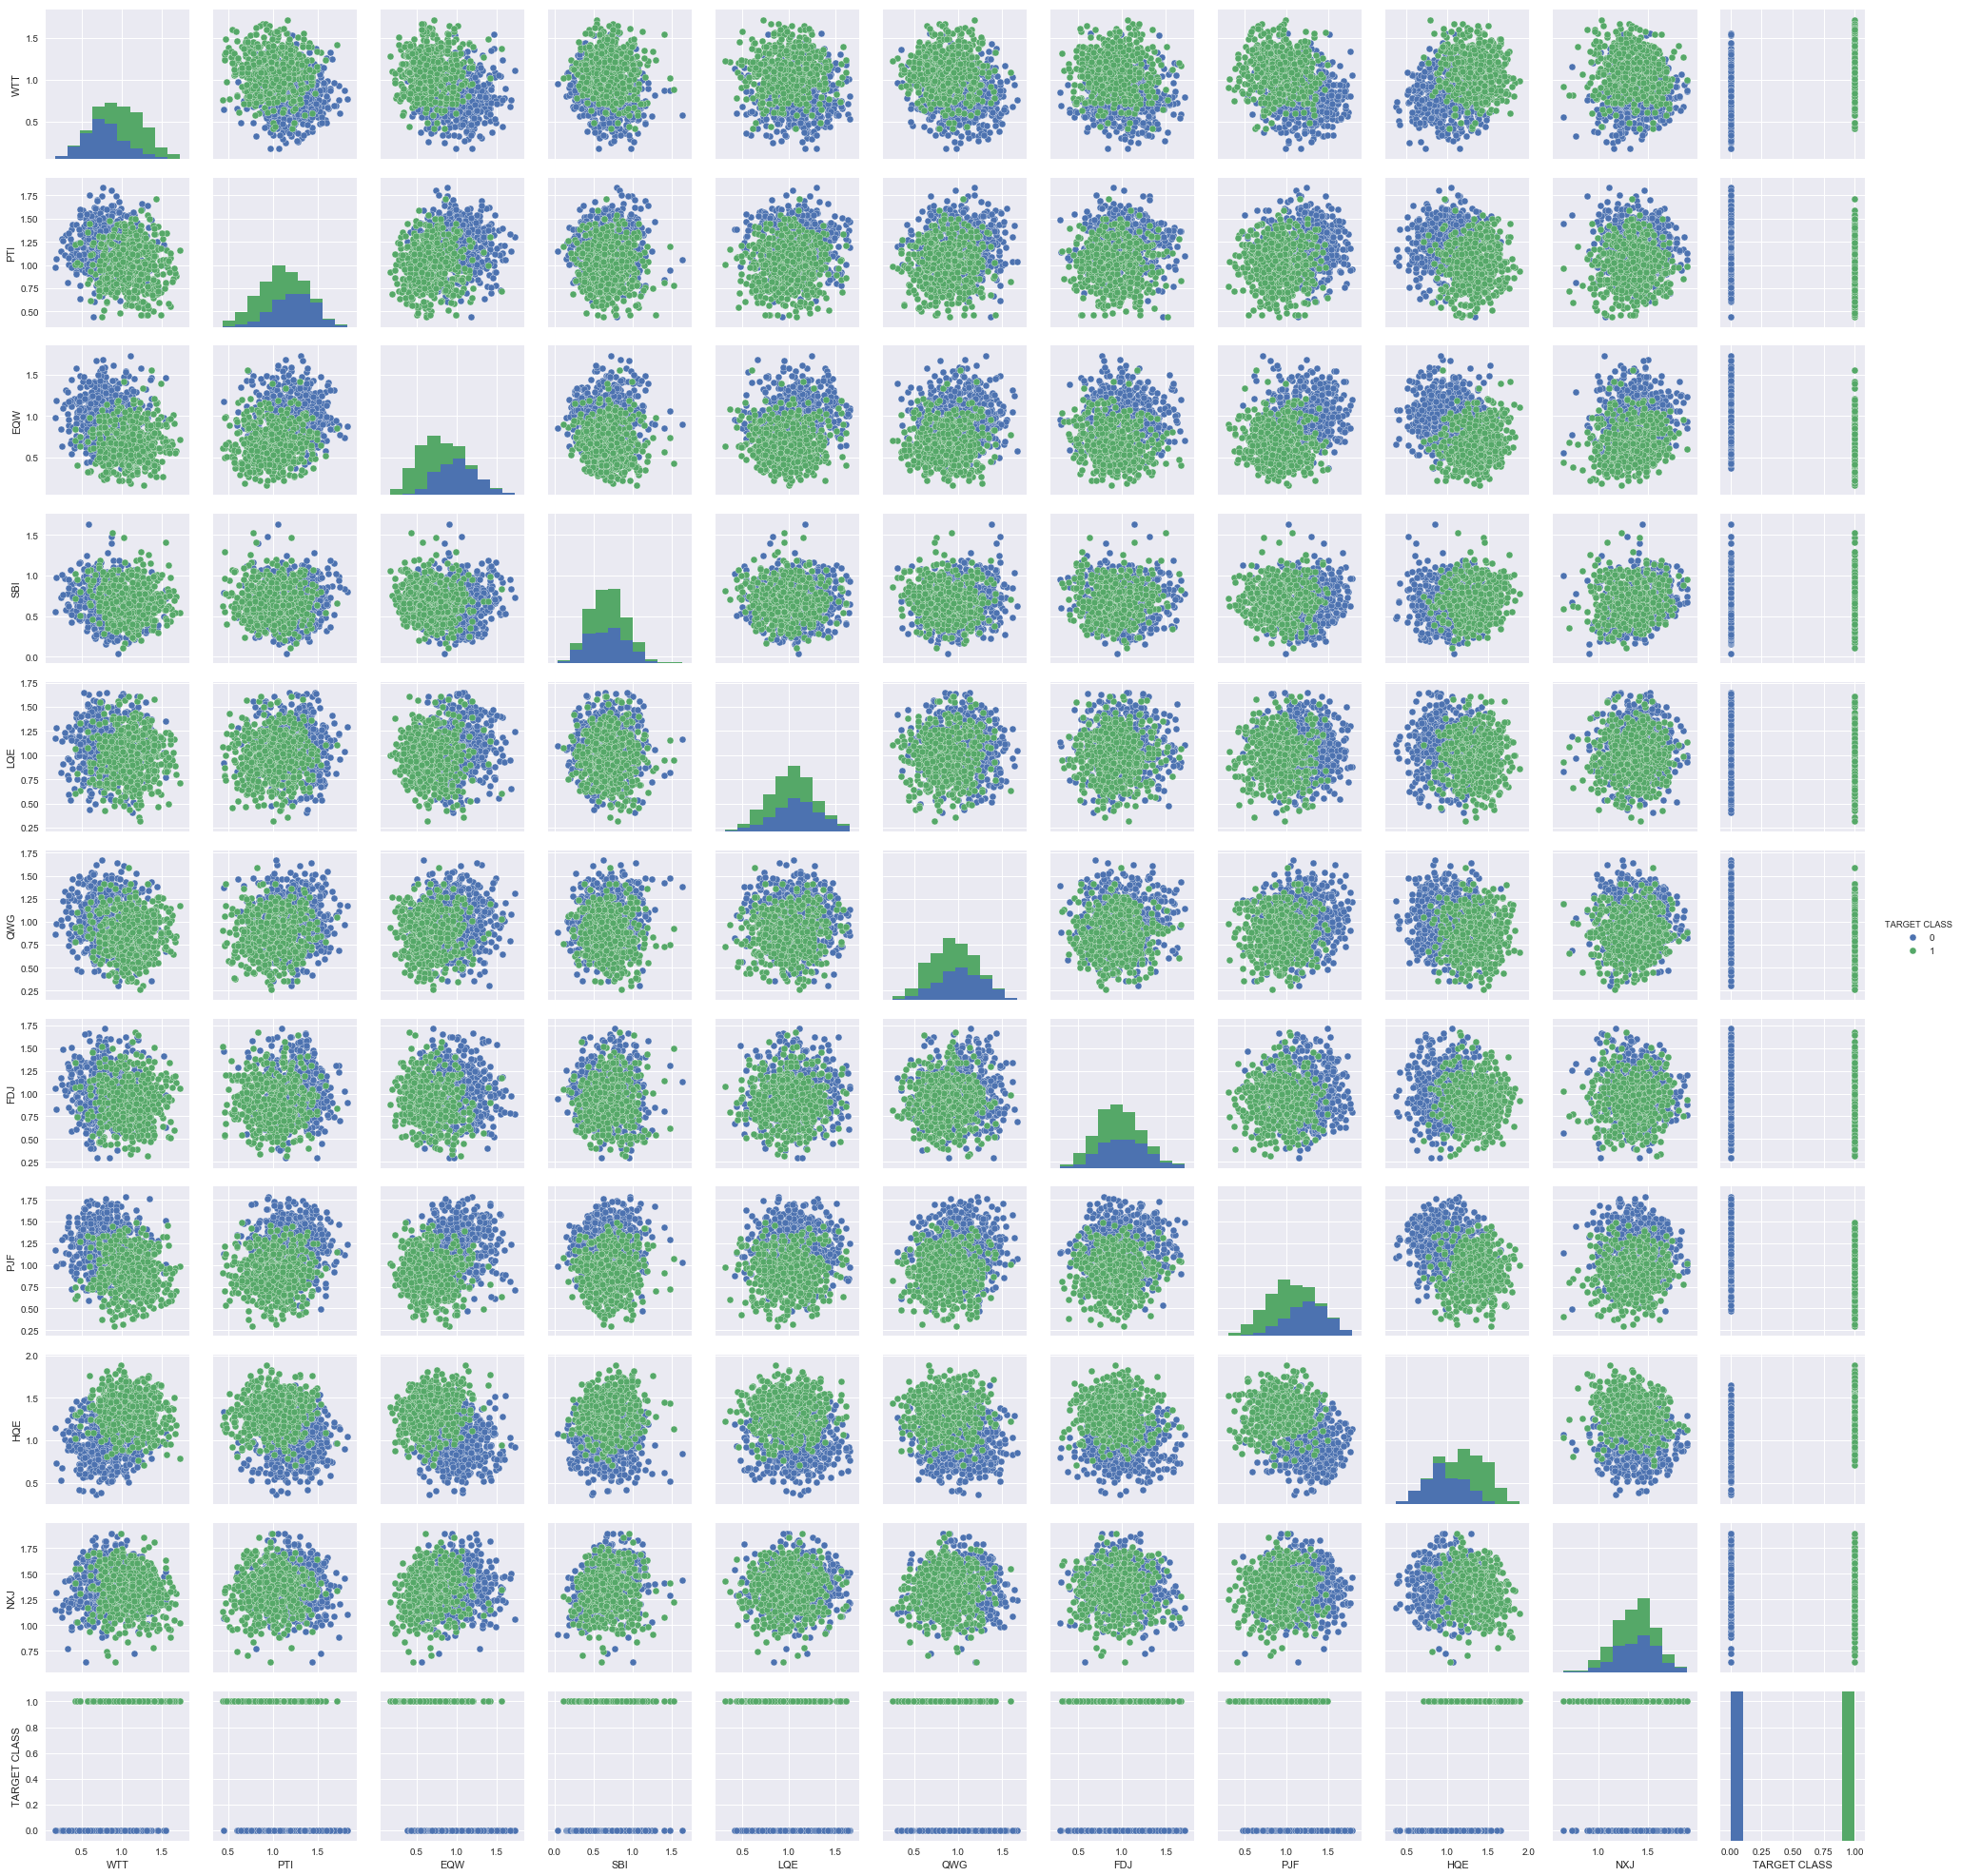

In [5]:
sns.pairplot(df,hue='TARGET CLASS') #always use pairplot to check the relation of every column with each other.

The idea behind StandardScaler is that it will transform your data such that its distribution will have a mean value 0 and standard deviation of 1. This is useful when you want to compare data that correspond to different units. In that case, you want to remove the units.

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaler = StandardScaler() 


In [8]:
scaler.fit(df.drop('TARGET CLASS',axis=1))  ###it could also be df.drop(iloc[:,-1],axis=1)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [10]:
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))

In [14]:
pd.DataFrame(scaled_features,columns=df.columns[:-1]).head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


Training the data

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X= scaled_features 
y= df['TARGET CLASS']  #####if you prefer you can use ILOC instead: X = iloc[:,-1]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
KNClassifier = KNeighborsClassifier()

In [22]:
KNClassifier.fit(X_train,y_train) #.fit is basic FITTING the data into the very Statistic Model.

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [23]:
y_pred = KNClassifier.predict(X_test)

In [24]:
from sklearn.metrics import confusion_matrix, classification_report

In [25]:
confusion_matrix(y_test,y_pred)

array([[135,   7],
       [ 10, 148]])

In [27]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.93      0.95      0.94       142
          1       0.95      0.94      0.95       158

avg / total       0.94      0.94      0.94       300



In [36]:
#to the check the K run this algorythm
error_rate = []

for i in range(1,40):
    
    KNClassifier = KNeighborsClassifier(n_neighbors=i)
    KNClassifier.fit(X_train,y_train)
    pred_i = KNClassifier.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

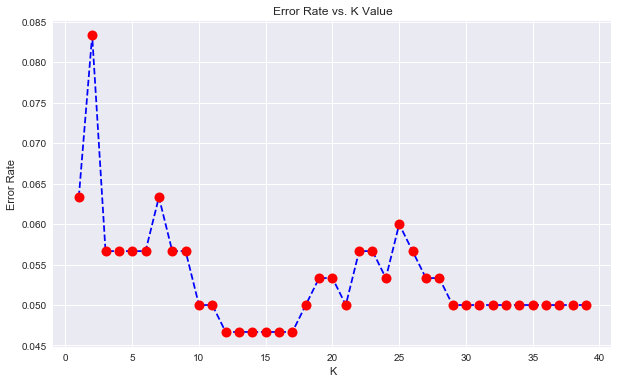

In [37]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [38]:
#Now check the low error rate for the new K value

In [47]:
KNnew = KNeighborsClassifier(n_neighbors=15)

In [48]:
KNnew.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=15, p=2,
           weights='uniform')

In [49]:
y_pred = KNnew.predict(X_test)

In [50]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.94      0.96      0.95       142
          1       0.96      0.95      0.96       158

avg / total       0.95      0.95      0.95       300



In [64]:
#it got just a little bit better, but depending on the data it can increase the accuracy hugely!

Fitting Logistic Regression to the Train set

In [65]:
from sklearn.linear_model import LogisticRegression

In [66]:
classifier = LogisticRegression()

In [68]:
classifier.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [69]:
predict = classifier.predict(X_test)

In [70]:
print(classification_report(y_test,predict))

             precision    recall  f1-score   support

          0       0.94      0.96      0.95       142
          1       0.96      0.95      0.96       158

avg / total       0.95      0.95      0.95       300

